In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Sudoku import Board
from Grover import Grover
import qiskit

# **Sudoky.py**

In [3]:
# Initialize a Board instance

sudoku_board = Board(unit_height=2,
                     unit_width=2,
                     grid_height=2,
                     grid_width=2,
                     init_value=-1)

sudoku_board.print_board()

[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1, -1]


In [4]:
# Get features of the board

print(f"sudoku unit size {sudoku_board.get_unit_size()}")
print(f"sudoku grid size {sudoku_board.get_grid_size()}")

sudoku unit size (2, 2)
sudoku grid size (2, 2)


In [5]:
# Get the open tuples
"""Unlike the thesis' open tuples description, this method returns a list
of tuples containing pair of cells that are not allowed to store the same
value. This list is the minimum subset of all possible field pairs which
need to be checked to achieve a valid solution"""

sudoku_board.get_open_tuples()

[((0, 0), (1, 0)),
 ((0, 0), (2, 0)),
 ((0, 0), (3, 0)),
 ((0, 0), (0, 1)),
 ((0, 0), (0, 2)),
 ((0, 0), (0, 3)),
 ((0, 0), (1, 1)),
 ((0, 1), (1, 1)),
 ((0, 1), (2, 1)),
 ((0, 1), (3, 1)),
 ((0, 1), (0, 2)),
 ((0, 1), (0, 3)),
 ((0, 1), (1, 0)),
 ((0, 2), (1, 2)),
 ((0, 2), (2, 2)),
 ((0, 2), (3, 2)),
 ((0, 2), (0, 3)),
 ((0, 2), (1, 3)),
 ((0, 3), (1, 3)),
 ((0, 3), (2, 3)),
 ((0, 3), (3, 3)),
 ((0, 3), (1, 2)),
 ((1, 0), (2, 0)),
 ((1, 0), (3, 0)),
 ((1, 0), (1, 1)),
 ((1, 0), (1, 2)),
 ((1, 0), (1, 3)),
 ((1, 1), (2, 1)),
 ((1, 1), (3, 1)),
 ((1, 1), (1, 2)),
 ((1, 1), (1, 3)),
 ((1, 2), (2, 2)),
 ((1, 2), (3, 2)),
 ((1, 2), (1, 3)),
 ((1, 3), (2, 3)),
 ((1, 3), (3, 3)),
 ((2, 0), (3, 0)),
 ((2, 0), (2, 1)),
 ((2, 0), (2, 2)),
 ((2, 0), (2, 3)),
 ((2, 0), (3, 1)),
 ((2, 1), (3, 1)),
 ((2, 1), (2, 2)),
 ((2, 1), (2, 3)),
 ((2, 1), (3, 0)),
 ((2, 2), (3, 2)),
 ((2, 2), (2, 3)),
 ((2, 2), (3, 3)),
 ((2, 3), (3, 3)),
 ((2, 3), (3, 2)),
 ((3, 0), (3, 1)),
 ((3, 0), (3, 2)),
 ((3, 0), (3

In [6]:
# Get the indexed open tuples
""" Numerates the cells from the upper left to the lower rigth one 
and translate the tuple of tuples in open tuples to a single tuple 
of integers

IT ONLY ADDS A PAIR OF CELLS TO THE LIST WHEN AT LEAST ONE OF THEM 
IS EMPTY """

sudoku_board.get_open_indexed_tuples()

[(0, 4),
 (0, 8),
 (0, 12),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 5),
 (1, 9),
 (1, 13),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 6),
 (2, 10),
 (2, 14),
 (2, 3),
 (2, 7),
 (3, 7),
 (3, 11),
 (3, 15),
 (3, 6),
 (4, 8),
 (4, 12),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 9),
 (5, 13),
 (5, 6),
 (5, 7),
 (6, 10),
 (6, 14),
 (6, 7),
 (7, 11),
 (7, 15),
 (8, 12),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 13),
 (9, 13),
 (9, 10),
 (9, 11),
 (9, 12),
 (10, 14),
 (10, 11),
 (10, 15),
 (11, 15),
 (11, 14),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 14),
 (13, 15),
 (14, 15)]

In [7]:
# Assigns a value to the given cells

values = [1, 4, 2, 3]
positions = [(0, 0), (1, 1), (2, 1), (3, 0)]

sudoku_board.update_board(values, positions)

In [8]:
sudoku_board.print_board()

[1, -1, -1, -1]
[-1, 4, -1, -1]
[-1, 2, -1, -1]
[3, -1, -1, -1]


# **Grover.py**

In [9]:
# Set an almost complete sudoku
sudoku_test = sudoku_board = Board(unit_height=2,
                     unit_width=2,
                     grid_height=2,
                     grid_width=2,
                     init_value=-1)

sudoku_test.print_board()

[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1, -1]


In [10]:
# Assigns a value to the given cells

values = [0, 3, 2, 1, 2, 1, 0, 3, 3, 0, 1, 2, 1]#, 2, 3]
positions = [(0, 0), (0, 1), (0, 2), (0, 3),
             (1, 0), (1, 1), (1, 2), (1, 3),
             (2, 0), (2, 1), (2, 2), (2, 3),
             (3, 0)]#, (3, 1), (3, 2)]

# values = [1, 4, 3, 2, 3, 2, 1, 4, 4, 1, 2, 3, 2, 3]
# positions = [(0, 0), (0, 1), (0, 2), (0, 3),
#              (1, 0), (1, 1), (1, 2), (1, 3),
#              (2, 0), (2, 1), (2, 2), (2, 3),
#              (3, 0), (3, 1)]

sudoku_test.update_board(values, positions)
sudoku_test.print_board()

[0, 3, 2, 1]
[2, 1, 0, 3]
[3, 0, 1, 2]
[1, -1, -1, -1]


In [11]:
tuples = sudoku_test.get_open_indexed_tuples()
tuples

[(1, 13),
 (2, 14),
 (3, 15),
 (5, 13),
 (6, 14),
 (7, 15),
 (8, 13),
 (9, 13),
 (10, 14),
 (10, 15),
 (11, 15),
 (11, 14),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 14),
 (13, 15),
 (14, 15)]

In [12]:
tuples = sudoku_board.get_open_indexed_tuples()
field_values = {0:0, 1:3, 2:2, 3:1,
                4:2, 5:1, 6:0, 7:3,
                8:3, 9:0, 10:1, 11:2,
                12:1}#, 13:2, 14:3}

"""field_values = {0:1, 1:4, 2:3, 3:2,
                4:3, 5:2, 6:1, 7:4,
                8:4, 9:1, 10:2, 11:3,
                12:2, 13:3}"""

grover = Grover(tuples=tuples, field_values=field_values, 
                subunit_height=2, subunit_width=2)

qc = grover.circuit


In [13]:
qc.num_qubits

47

In [14]:
from pytket.extensions.qiskit import qiskit_to_tk
from pytket.circuit.display import render_circuit_jupyter

tket_circ = qiskit_to_tk(qc)
render_circuit_jupyter(tket_circ)

In [17]:
from pytket.extensions.qiskit import AerBackend

backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(tket_circ)

handle = backend.process_circuit(compiled_circ, n_shots=2048)
counts = backend.get_result(handle).get_counts()

AttributeError: 'QasmSimulator' object has no attribute 'get_compiled_circuit'

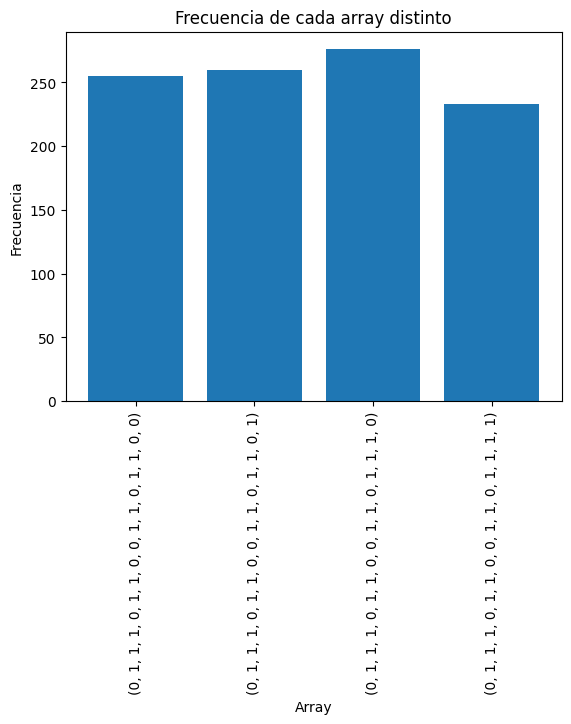

In [16]:
from pytket.utils import probs_from_counts
import matplotlib.pyplot as plt

etiquetas = [str(state) for state in counts.keys()]
frequencies = [freq for freq in counts.values()]

plt.bar(etiquetas, frequencies)
plt.xlabel('Array')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada array distinto')
plt.xticks(rotation=90)
plt.show()

### What does __set_circuit() do?

In [17]:
tuples

[(3, 15), (7, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15)]

In [18]:
# gets the unique cells to compare

field_index_set = set([t for tup in grover.tuples for t in tup])
field_index_set
# unique_bits = set([t for tup in tuples for t in tup])
# unique_bits

{3, 7, 10, 11, 12, 13, 14, 15}

In [19]:
""" field_values = {0:1, 1:4, 2:3, 3:2,
    4:3, 5:2, 6:1, 7:4,
    8:4, 9:1, 10:2, 11:3,
    12:2, 13:3} """

# Assign a new index to the cells to compare
# norm = {original:index for index, original in enumerate(unique_bits)}
# norm

normalized_dict = {original:index for index, original in enumerate(field_index_set)}
normalized_dict

{3: 0, 7: 1, 10: 2, 11: 3, 12: 4, 13: 5, 14: 6, 15: 7}

In [20]:
# Creates a field value dict with the new indices and the value in the cell
normalized_field_values = {normalized_dict.get(k) : v for k, v in field_values.items()} # if k in norm}
t = normalized_field_values
t

{None: 0, 0: 1, 1: 3, 2: 1, 3: 2, 4: 1, 5: 2, 6: 3}

In [21]:
grover.normalized_field_values

{0: 1, 1: 3, 2: 1, 3: 2, 4: 1, 5: 2, 6: 3}

In [22]:
from numpy import binary_repr as bin
import numpy as np

In [23]:
len(t)

8

In [24]:
grover.padded_binary(4, 2)

'100'

In [25]:
bin(2, 2)

'10'

In [26]:
re_dict = {}
number_of_qubits = 20
color_size = 2

for i in range(int(number_of_qubits/color_size)):
    field_value = grover.normalized_field_values.get(i)
    for j in range(color_size):
        if field_value == None:
            re_dict[i*color_size+j] = [1, 1]/np.sqrt(2)
        else:
            binary_value = grover.padded_binary(field_value, color_size)
            if binary_value[j] == '0':
                re_dict[i*color_size+j] = [1, 0]
            else:
                re_dict[i*color_size+j] = [0, 1]
re_dict

{0: [1, 0],
 1: [0, 1],
 2: [0, 1],
 3: [0, 1],
 4: [1, 0],
 5: [0, 1],
 6: [0, 1],
 7: [1, 0],
 8: [1, 0],
 9: [0, 1],
 10: [0, 1],
 11: [1, 0],
 12: [0, 1],
 13: [0, 1],
 14: array([0.70710678, 0.70710678]),
 15: array([0.70710678, 0.70710678]),
 16: array([0.70710678, 0.70710678]),
 17: array([0.70710678, 0.70710678]),
 18: array([0.70710678, 0.70710678]),
 19: array([0.70710678, 0.70710678])}

In [27]:
temp = grover.get_qubit_inits(20, 2)

In [28]:
temp

{0: [1, 0],
 1: [0, 1],
 2: [0, 1],
 3: [0, 1],
 4: [1, 0],
 5: [0, 1],
 6: [0, 1],
 7: [1, 0],
 8: [1, 0],
 9: [0, 1],
 10: [0, 1],
 11: [1, 0],
 12: [0, 1],
 13: [0, 1],
 14: array([0.70710678, 0.70710678]),
 15: array([0.70710678, 0.70710678]),
 16: array([0.70710678, 0.70710678]),
 17: array([0.70710678, 0.70710678]),
 18: array([0.70710678, 0.70710678]),
 19: array([0.70710678, 0.70710678])}

In [29]:
unknown_q = [pos for pos, val in temp.items() if val[0] not in [0, 1]]
unknown_q

[14, 15, 16, 17, 18, 19]

In [30]:
grover.normalized_tuples

[(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]

In [31]:
normalized_dict = {original:index for index, original in enumerate(field_index_set)}
normalized_dict

{3: 0, 7: 1, 10: 2, 11: 3, 12: 4, 13: 5, 14: 6, 15: 7}

In [32]:
grover.normalized_tuples

[(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]

In [33]:
grover.get_all_sublists(4,1)

[(0,), (2,), (3,), (0, 2), (0, 3), (2, 3), (0, 2, 3)]

## Flipper

In [34]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [35]:
color_size = 2

in_qubits = QuantumRegister(4, name='in')
compare_qubits = QuantumRegister(1, name='cmp')

qc = QuantumCircuit(in_qubits, compare_qubits)

#### Part 1

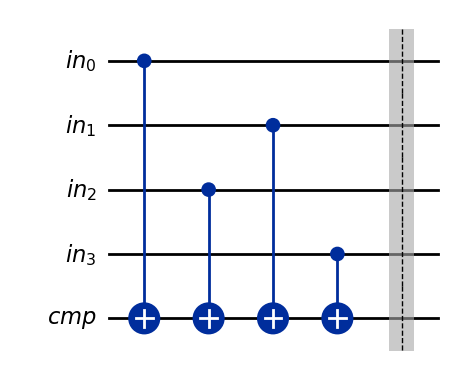

In [36]:
for i in range(color_size):
    x_i = 0*color_size+i
    y_i = 1*color_size+i
    qc.cx([x_i, y_i], compare_qubits[0])

qc.barrier()
qc.draw('mpl')

[1]
[0]


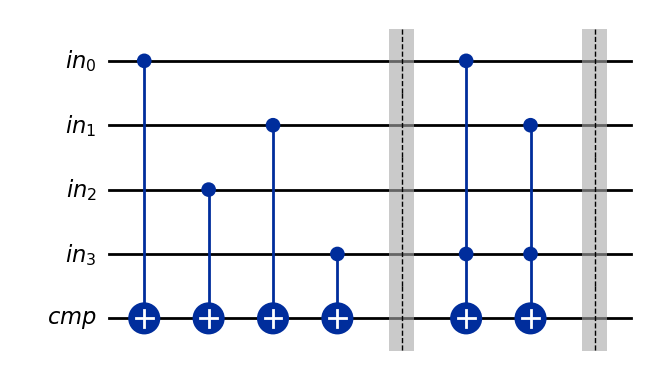

In [37]:
for i in range(color_size):
    sublists_part_3 = grover.get_all_sublists(color_size, i)
    x_i = 0*color_size+i
    y_i = 1*color_size+i
    for e in sublists_part_3:
        list_e = list(e) # Convert each tuple from sublists_3 into a list
        # if the lenth of this list is 1 you just campare two bits and dont have to do it twice
        # otherwise you get the same ones twice
        print(list_e)
        if len(list_e) == 1:
            qc.ccx(x_i, y_i+list_e[0], compare_qubits[0])
        else:
            pass

qc.barrier()
qc.draw('mpl')

ok


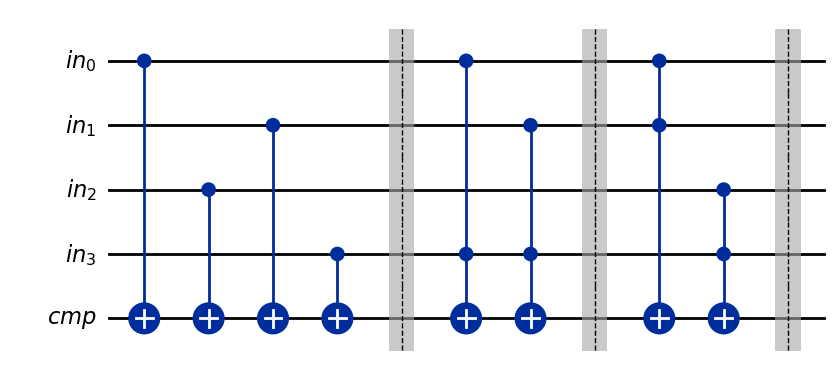

In [38]:
sublists_part_2 = grover.get_all_sublists(color_size, -1)
for e in sublists_part_2:
    list_e = list(e)
    # if more than on eelement is in list_e you apply a mcx to them within one color register
    # this can be generalized and combined with Part 1 later in the optimization
    if len(list_e) > 1:
        print("ok")
        control_list_x = [0*color_size+x_i for x_i in list_e]
        control_list_y = [1*color_size+y_i for y_i in list_e]
        qc.ccx(control_list_x[:1], control_list_x[1:], compare_qubits[0])
        qc.ccx(control_list_y[:1], control_list_y[1:], compare_qubits[0])

qc.barrier()
qc.draw("mpl")

In [39]:
in_qubits = QuantumRegister(4, name='in')
compare_qubits = QuantumRegister(1, name='cmp')

qc = QuantumCircuit(in_qubits, compare_qubits)

ok


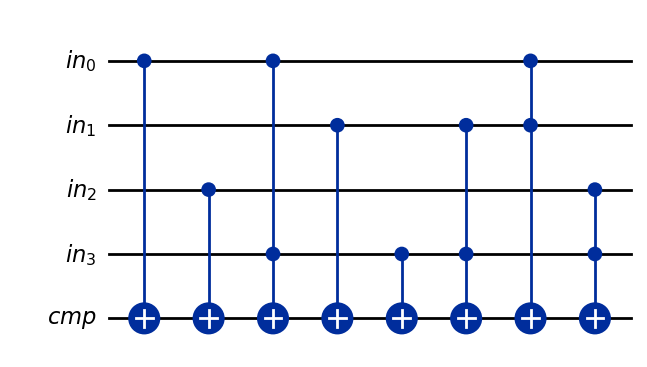

In [40]:
grover.flipper(qc, 0, 1, compare_qubits, 0, 2)
qc.draw('mpl')

# Modified flipper

In [41]:
import itertools

def generate_valid_combinations(elements, combination_size, forbidden_difference):
    """
    Generates valid combinations of a set of elements that meet the condition
    that the difference between any pair of elements is not equal to forbidden_difference.
    
    :param elements: Set of elements to generate combinations from.
    :param combination_size: Size of each combination.
    :param forbidden_difference: Forbidden difference between elements in a combination.
    :return: List of valid combinations.
    """
    
    # Function to check the condition of difference
    def difference_is_not_forbidden(combination):
        for a, b in itertools.combinations(combination, 2):
            if abs(a - b) == forbidden_difference:
                return False
        return True
    
    # Generate all possible combinations of the specified size
    valid_combinations = [
        combination for combination in itertools.combinations(elements, combination_size) 
        if difference_is_not_forbidden(combination)
    ]
    
    return valid_combinations


In [42]:
color_size = 4
x = 0
y = 1
qubit_indices = list(range(x*color_size, (x+1)*color_size)) + list(range(y*color_size, (y+1)*color_size))
generate_valid_combinations(qubit_indices, 3, color_size)

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 3),
 (0, 2, 5),
 (0, 2, 7),
 (0, 3, 5),
 (0, 3, 6),
 (0, 5, 6),
 (0, 5, 7),
 (0, 6, 7),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 7),
 (1, 3, 4),
 (1, 3, 6),
 (1, 4, 6),
 (1, 4, 7),
 (1, 6, 7),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (2, 4, 7),
 (2, 5, 7),
 (3, 4, 5),
 (3, 4, 6),
 (3, 5, 6),
 (4, 5, 6),
 (4, 5, 7),
 (4, 6, 7),
 (5, 6, 7)]

In [43]:
qubit_indices[::2]

[0, 2, 4, 6]

In [44]:
def mod_flipper(quantum_circuit, x, y, compare_register, color_size, tuple_index):
    x_qubits = list(range(x*color_size, (x+1)*color_size))
    y_qubits = list(range(y*color_size, (y+1)*color_size))
    qubit_indices = x_qubits + y_qubits

    # Apply XOR gates qubitwise between the x_qubits and y_qubits
    for i in range(color_size):
        quantum_circuit.cx(x_qubits[i], compare_register[tuple_index])
        quantum_circuit.cx(y_qubits[i], compare_register[tuple_index])


    for i in range(2, color_size+1):
        combinations = generate_valid_combinations(qubit_indices, i, color_size)
        for comb in combinations:
            quantum_circuit.mcx(list(comb), compare_register[tuple_index])

    

In [45]:
color_size = 3

in_qubits = QuantumRegister(color_size*2, name='in')
compare_qubits = QuantumRegister(1, name='cmp')

qc = QuantumCircuit(in_qubits, compare_qubits)

In [46]:
mod_flipper(qc, x=0, y=1, compare_register=compare_qubits, color_size=color_size, tuple_index=0)

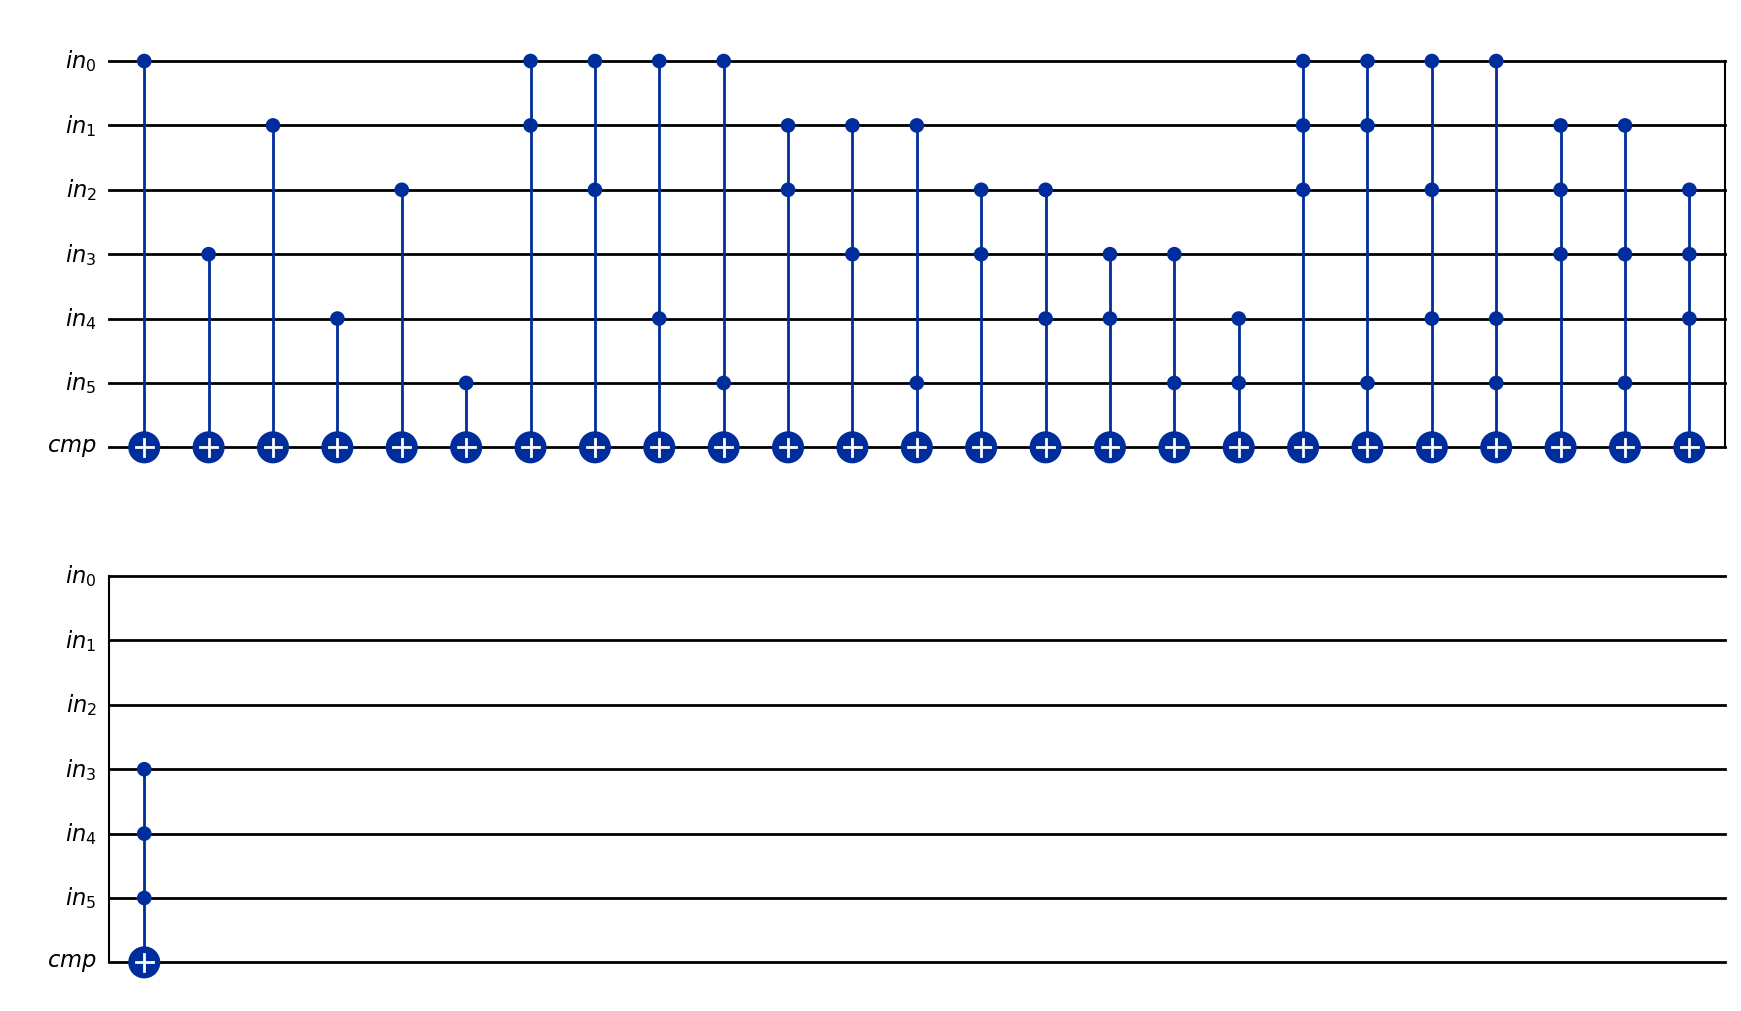

In [47]:
qc.draw('mpl')

In [48]:
color_size = 3

in_qubits = QuantumRegister(color_size*2, name='in')
compare_qubits = QuantumRegister(1, name='cmp')

qc = QuantumCircuit(in_qubits, compare_qubits)

In [49]:
grover.modified_flipper(qc, x=0, y=1, compare_register=compare_qubits, color_size=color_size, tuple_index=0)

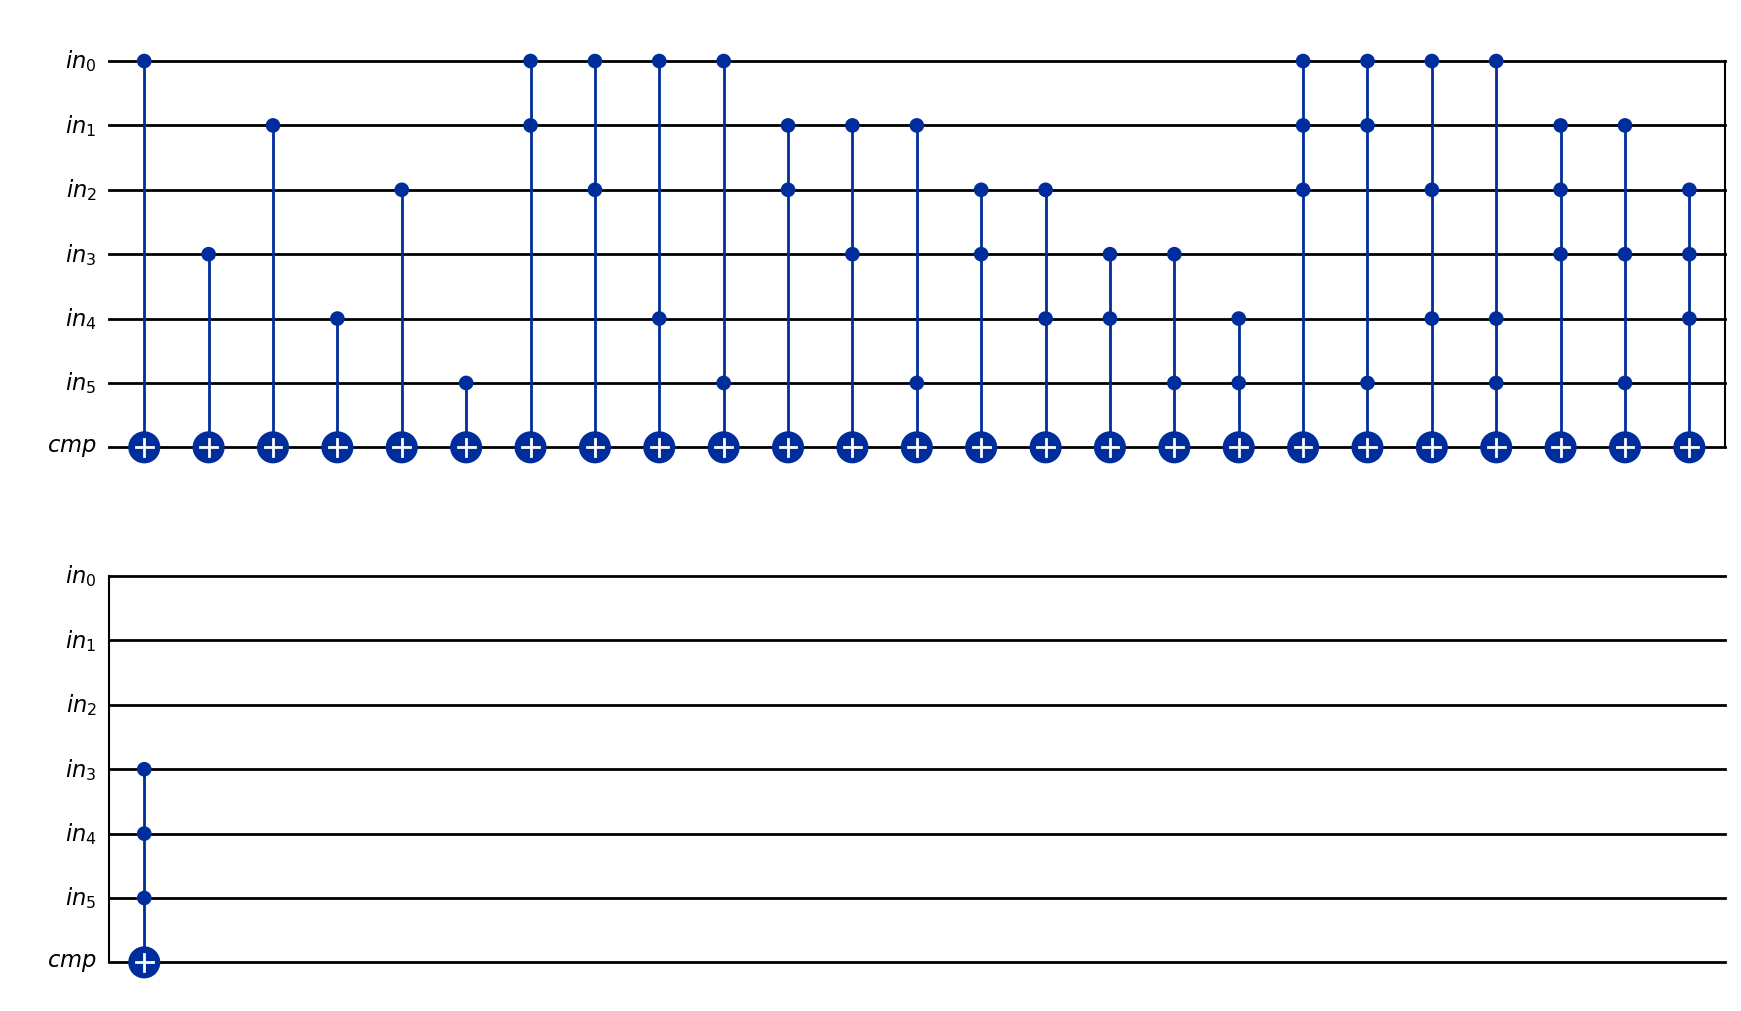

In [50]:
qc.draw('mpl')

# Oracle

In [51]:
tuples = [(0, 1), 
          (0, 2)]

In [52]:
color_size = 2
n_cells = 3

in_qubits = QuantumRegister(color_size*n_cells, name='in')
compare_qubits = QuantumRegister(len(tuples), name='cmp')
out_qubit = QuantumRegister(1, name='out')

qc = QuantumCircuit(in_qubits, compare_qubits, out_qubit)

In [53]:
grover.graph_coloring_oracle(qc, compare_qubits, out_qubit, color_size, tuples)

ok
ok


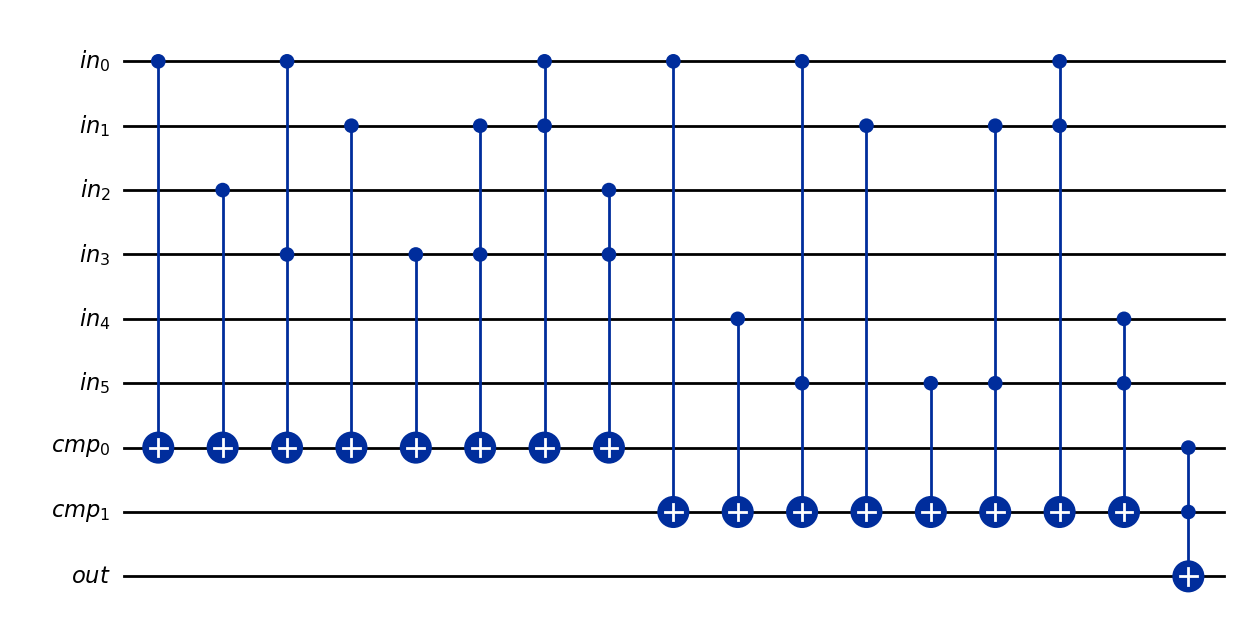

In [54]:
qc.draw('mpl')

# Modified oracle

In [55]:
tuples = [(0, 1),
          (0, 2)]

In [56]:
color_size = 2
n_cells = 3

in_qubits = QuantumRegister(color_size*n_cells, name='in')
compare_qubits = QuantumRegister(len(tuples), name='cmp')
out_qubit = QuantumRegister(1, name='out')

qc = QuantumCircuit(in_qubits, compare_qubits, out_qubit)

In [57]:
grover.modified_graph_coloring_oracle(qc, compare_qubits, out_qubit, color_size, tuples)

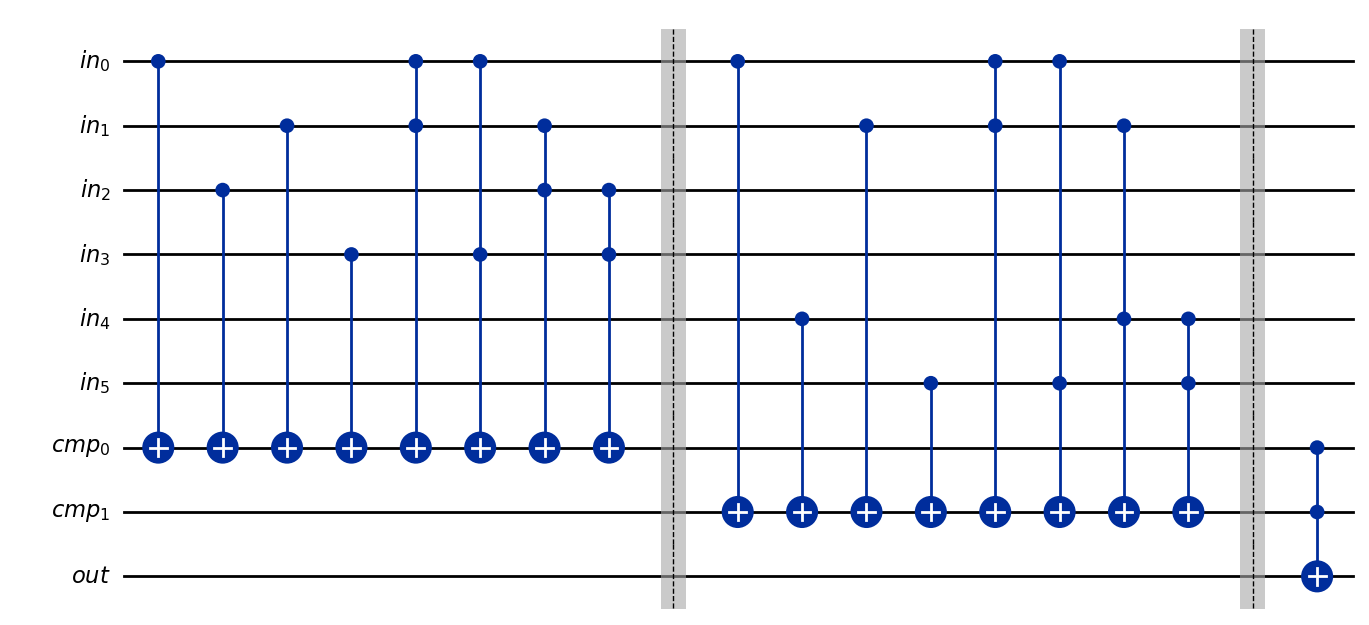

In [58]:
qc.draw('mpl')

# Circuit